In this task we are implementing reinforcement learning using neural network to solve a linear maze problem.

In [1]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import linalg as LA

#From manuscript
def rho(s,a):
    return(s==1 and a==0)+2*(s==3 and a==1)
def tau(s,a):
    if s==0 or s==4:  return(s)
    else:      return(s+a)
def calc_policy(Q):
    policy=np.zeros(5)
    for s in range(0,5):
        action_idx=np.argmax(Q[s,:])
        policy[s]=2*action_idx-1
        policy[0]=policy[4]=0
    return policy.astype(int)
def idx(a):
    return(int((a+1)/2))

In [2]:
#Feed forward part of th network
W = tf.Variable(tf.random_uniform([5,2],0,0.01))  #Weight
inp = tf.placeholder(shape=[1,5],dtype=tf.float32)  #Input
Q = tf.matmul(inp,W)

pred = tf.argmax(Q,1)
nextQ = tf.placeholder(shape=[1,2],dtype=tf.float32)
netLoss = tf.reduce_sum(tf.square(nextQ - Q))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1)
upMod = train.minimize(netLoss)

Action Description<br>
1:Left | -1:Right | 0:Stay

In [3]:
init = tf.global_variables_initializer()

#Initializing learning paramters
valuefunc = np.array([[0.0,1.0,0.5,0.5,0.0],[0.0,0.5,1.0,2.0,0.0]])
num_episodes = 400
gamma = .05 #discount factor
e = 0.1
loss = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = np.random.randint(0,5) #state

        k = 0
        for k in range(5):
            #Action and allQ
            action,Qs = sess.run([pred,Q],feed_dict={inp:np.identity(5)[s:s+1]}) 
            NewState = tau(s,action[0])
            
            #Q fucntion value of new state
            Q1 = sess.run(Q,feed_dict={inp:np.identity(5)[NewState:NewState+1]})
            
            #max  Q value
            maxQ1 = np.max(Q1)
            targetQ = Qs
            reward = rho(s,action[0])
            targetQ[0,action[0]] = reward + gamma*maxQ1
            sess.run([upMod,W],feed_dict={inp:np.identity(5)[s:s+1],nextQ:targetQ})
            s = NewState
            k+=1
            
        #Calculating loss functioin
        loss.append(LA.norm(tf.global_variables()[0].eval().T-valuefunc)) 
    p = calc_policy(tf.global_variables()[0].eval())
    print('The Best Policy is '+str(p))

The Best Policy is [0 1 1 1 0]


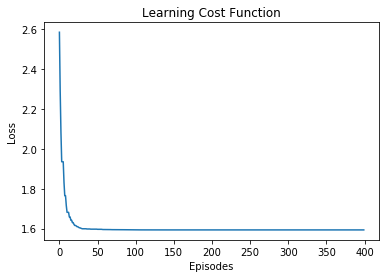

In [4]:
plt.title('Learning Cost Function')
plt.xlabel('Episodes')
plt.ylabel('Loss')
plt.plot(loss)
plt.show()

Reference <br>
https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0